# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**McMuanshe, Munemo**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd # for data loading 
import numpy as np # for data manipilation 
import matplotlib.pyplot as plt # for data visualisation
from matplotlib import rc
import seaborn as sns

# Libraries for data preparation and model building
# import *

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [83]:
df = pd.read_csv('df_train.csv') # load the data
test_df = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics

In [4]:
# plot relevant feature interactions

In [5]:
# evaluate correlation

In [6]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [4]:
# remove missing values/ features
copy_df = df.drop(['Unnamed: 0'], axis=1) # removed column because it was not telling us anything 
copy_df.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667           level_5             0.0   
1  2015-01-01 06:00:00           0.333333          level_10             0.0   
2  2015-01-01 09:00:00           1.000000           level_9             0.0   
3  2015-01-01 12:00:00           1.000000           level_8             0.0   
4  2015-01-01 15:00:00           1.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0           1.000000                 0.0       223.333333   
1           1.000000                 0.0       221.000000   
2           1.000000                 0.0       214.333333   
3           1.000000                 0.0       199.666667   
4           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0             sp25              0.0   
1            3.333333                0.0             sp25              0.0   
2            2.666667                0.0             sp25              0.0   
3            4.000000                0.0             sp25              0.0   
4            3.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4                NaN        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.728333   

In [5]:
#convert time to datetime

copy_df.time = copy_df.time.astype('datetime64[ns]')
copy_df['year'] = pd.DatetimeIndex(copy_df['time']).year
copy_df['month'] = pd.DatetimeIndex(copy_df['time']).month
copy_df['day'] = pd.DatetimeIndex(copy_df['time']).day
copy_df['hour'] = pd.DatetimeIndex(copy_df['time']).hour


In [6]:
col_titles = ['time'] + ['year'] + ['month'] + ['day'] + ['hour'] + [col for col in copy_df.columns \
     if col not in ['time', 'year', 'month', 'day', 'hour']]

copy_df = copy_df.reindex(columns= col_titles)

copy_df.head(3)

time  year  month  day  hour  Madrid_wind_speed  \
0 2015-01-01 03:00:00  2015      1    1     3           0.666667   
1 2015-01-01 06:00:00  2015      1    1     6           0.333333   
2 2015-01-01 09:00:00  2015      1    1     9           1.000000   

  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0           level_5             0.0             0.666667         74.333333   
1          level_10             0.0             1.666667         78.333333   
2           level_9             0.0             1.000000         71.333333   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0        64.000000                0.0                1.0                 0.0   
1        64.666667                0.0                1.0                 0.0   
2        64.333333                0.0                1.0                 0.0   

   Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
0       223.333333              6.333333           42.666667   
1       221.000000              4.000000          139.000000   
2       214.333333              2.000000          326.000000   

   Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h Seville_pressure  \
0                0.0            3.333333                0.0             sp25   
1                0.0            3.333333                0.0             sp25   
2                0.0            2.666667                0.0             sp25   

   Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  \
0              0.0             0.0         1036.333333              0.0   
1              0.0             0.0         1037.333333              0.0   
2              0.0             0.0         1038.000000              0.0   

   Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0             0.0                0.0               0.0              800.0   
1             0.0                0.0               0.0              800.0   
2             0.0                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.728333              800.0    274.945000          71.000000   
2     278.008667              800.0    278.792000          65.666667   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0         269.888000          281.013000       265.938000      281.013000   
1         271.728333          280.561667       266.386667      280.561667   
2         278.008667          281.583667       272.708667      281.583667   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667   265.938000       265.938000        6715.666667  
1        274.945000   266.386667       266.386667        4171.666667  
2        278.792000   272.708667       272.708667        4274.666667

In [7]:
# copy_df =copy_df.drop('time', axis='columns')

In [8]:
# copy_df.head()

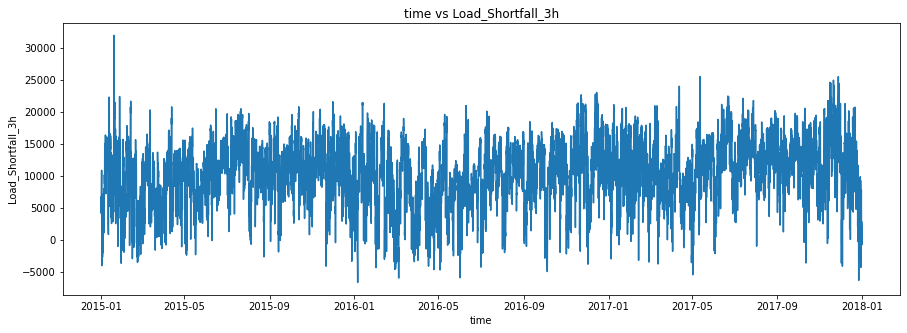

In [9]:

plt.figure(figsize=(15,5))
plt.plot(copy_df['time'],
        copy_df['load_shortfall_3h'])
plt.title('time vs Load_Shortfall_3h')
plt.xlabel('time')
plt.ylabel('Load_Shortfall_3h')
plt.show()


In [10]:
copy_df.columns

Index(['time', 'year', 'month', 'day', 'hour', 'Madrid_wind_speed',
       'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id',
       'Bilbao_pressure', 'Seville_weather_id', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilb

In [11]:
copy_df.isnull().sum() #check for misssing values 

time                       0
year                       0
month                      0
day                        0
hour                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressur

In [12]:
copy_df[['Madrid_pressure', 'Valencia_pressure']].describe()

Madrid_pressure  Valencia_pressure
count      8763.000000        6695.000000
mean       1010.316920        1012.051407
std          22.198555           9.506214
min         927.666667         972.666667
25%        1012.333333        1010.333333
50%        1017.333333        1015.000000
75%        1022.000000        1018.000000
max        1038.000000        1021.666667

In [13]:
copy_df[['Madrid_pressure', 'Valencia_pressure']].corr()

Madrid_pressure  Valencia_pressure
Madrid_pressure           1.000000           0.799272
Valencia_pressure         0.799272           1.000000

In [14]:
#Replace the null values in Valencia_pressure with Madrid_pressure values on the same row.
copy_df.loc[copy_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     copy_df.loc[copy_df['Valencia_pressure'].isna(), 'Madrid_pressure']

In [15]:
copy_df.isnull().sum()

time                    0
year                    0
month                   0
day                     0
hour                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp

In [16]:
new_df = copy_df.copy()

In [17]:
new_df.head()

time  year  month  day  hour  Madrid_wind_speed  \
0 2015-01-01 03:00:00  2015      1    1     3           0.666667   
1 2015-01-01 06:00:00  2015      1    1     6           0.333333   
2 2015-01-01 09:00:00  2015      1    1     9           1.000000   
3 2015-01-01 12:00:00  2015      1    1    12           1.000000   
4 2015-01-01 15:00:00  2015      1    1    15           1.000000   

  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0           level_5             0.0             0.666667         74.333333   
1          level_10             0.0             1.666667         78.333333   
2           level_9             0.0             1.000000         71.333333   
3           level_8             0.0             1.000000         65.333333   
4           level_7             0.0             1.000000         59.000000   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0        64.000000                0.0           1.000000                 0.0   
1        64.666667                0.0           1.000000                 0.0   
2        64.333333                0.0           1.000000                 0.0   
3        56.333333                0.0           1.000000                 0.0   
4        57.000000                2.0           0.333333                 0.0   

   Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
0       223.333333              6.333333           42.666667   
1       221.000000              4.000000          139.000000   
2       214.333333              2.000000          326.000000   
3       199.666667              2.333333          273.000000   
4       185.000000              4.333333          260.000000   

   Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h Seville_pressure  \
0                0.0            3.333333                0.0             sp25   
1                0.0            3.333333                0.0             sp25   
2                0.0            2.666667                0.0             sp25   
3                0.0            4.000000                0.0             sp25   
4                0.0            3.000000                0.0             sp25   

   Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  \
0              0.0             0.0         1036.333333              0.0   
1              0.0             0.0         1037.333333              0.0   
2              0.0             0.0         1038.000000              0.0   
3              0.0             0.0         1037.000000              0.0   
4              0.0             0.0         1035.000000              0.0   

   Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0             0.0                0.0               0.0              800.0   
1             0.0                0.0               0.0              800.0   
2             0.0                0.0               0.0              800.0   
3             0.0                0.0               0.0              800.0   
4             0.0                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4        1035.333333        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao

- According to the info on Kaggle {City Name}_wind_degree and {City Name}_pressure are expressed as a category. There might have been human error while capturing the data. There were suppose to be recorded as categorical but some cities recorded as numerical. We have to fix this.
- We can try one hot encoding but we might run into issues seeing that the pressure column has 25 categories 

In [18]:
df_dummies = pd.get_dummies(new_df, drop_first = True)

df_dummies.head()

time  year  month  day  hour  Madrid_wind_speed  \
0 2015-01-01 03:00:00  2015      1    1     3           0.666667   
1 2015-01-01 06:00:00  2015      1    1     6           0.333333   
2 2015-01-01 09:00:00  2015      1    1     9           1.000000   
3 2015-01-01 12:00:00  2015      1    1    12           1.000000   
4 2015-01-01 15:00:00  2015      1    1    15           1.000000   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                0.0           1.000000                 0.0       223.333333   
1                0.0           1.000000                 0.0       221.000000   
2                0.0           1.000000                 0.0       214.333333   
3                0.0           1.000000                 0.0       199.666667   
4                2.0           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  \
0            3.333333                0.0              0.0             0.0   
1            3.333333                0.0              0.0             0.0   
2            2.666667                0.0              0.0             0.0   
3            4.000000                0.0              0.0             0.0   
4            3.000000                0.0              0.0             0.0   

   Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
0         1036.333333              0.0             0.0                0.0   
1         1037.333333              0.0             0.0                0.0   
2         1038.000000              0.0             0.0                0.0   
3         1037.000000              0.0             0.0                0.0   
4         1035.000000              0.0             0.0                0.0   

   Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0               0.0              800.0                 800.0      1035.000000   
1               0.0              800.0                 800.0      1035.666667   
2               0.0              800.0                 800.0      1036.000000   
3               0.0              800.0                 800.0      1036.000000   
4               0.0              800.0                 800.0      1035.333333   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0               800.0        1002.666667        274.254667       971.333333   
1               800.0        1004.333333        274.945000       972.666667   
2               800.0        1005.333333        278.792000       974.000000   
3               800.0        1009.000000        285.394000       994.666667   
4               800.0        1035.333333        285.513719      1035.333333   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0         269.888000     269.888000              800.0    274.254667   
1         271.728333     271.728333              800.0    274.945000   
2         278.008667     278.008667              800.0    278.792000   
3         284.899552     284.899552              800.0    285.394000   
4         283.01511

Using the dummy variable dataframe, we can build a model that predicts load_shortfall_3h (our dependent variable) as a function of 82 different independent variables (IVs)

Before we do this, however, let's reorder columns so that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easier to interpret.

In [19]:
column_titles = [col for col in df_dummies.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_dummies = df_dummies.reindex(columns = column_titles)

In [20]:
df_dummies.head()

time  year  month  day  hour  Madrid_wind_speed  \
0 2015-01-01 03:00:00  2015      1    1     3           0.666667   
1 2015-01-01 06:00:00  2015      1    1     6           0.333333   
2 2015-01-01 09:00:00  2015      1    1     9           1.000000   
3 2015-01-01 12:00:00  2015      1    1    12           1.000000   
4 2015-01-01 15:00:00  2015      1    1    15           1.000000   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                0.0           1.000000                 0.0       223.333333   
1                0.0           1.000000                 0.0       221.000000   
2                0.0           1.000000                 0.0       214.333333   
3                0.0           1.000000                 0.0       199.666667   
4                2.0           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  \
0            3.333333                0.0              0.0             0.0   
1            3.333333                0.0              0.0             0.0   
2            2.666667                0.0              0.0             0.0   
3            4.000000                0.0              0.0             0.0   
4            3.000000                0.0              0.0             0.0   

   Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
0         1036.333333              0.0             0.0                0.0   
1         1037.333333              0.0             0.0                0.0   
2         1038.000000              0.0             0.0                0.0   
3         1037.000000              0.0             0.0                0.0   
4         1035.000000              0.0             0.0                0.0   

   Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0               0.0              800.0                 800.0      1035.000000   
1               0.0              800.0                 800.0      1035.666667   
2               0.0              800.0                 800.0      1036.000000   
3               0.0              800.0                 800.0      1036.000000   
4               0.0              800.0                 800.0      1035.333333   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0               800.0        1002.666667        274.254667       971.333333   
1               800.0        1004.333333        274.945000       972.666667   
2               800.0        1005.333333        278.792000       974.000000   
3               800.0        1009.000000        285.394000       994.666667   
4               800.0        1035.333333        285.513719      1035.333333   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0         269.888000     269.888000              800.0    274.254667   
1         271.728333     271.728333              800.0    274.945000   
2         278.008667     278.008667              800.0    278.792000   
3         284.899552     284.899552              800.0    285.394000   
4         283.01511

In [22]:
df_dummies.kurtosis()

year                            -1.498369
month                           -1.207760
day                             -1.193873
hour                            -1.237868
Madrid_wind_speed                2.036462
Bilbao_rain_1h                  32.904656
Valencia_wind_speed             35.645426
Seville_humidity                -1.017983
Madrid_humidity                 -1.167537
Bilbao_clouds_all               -1.533417
Bilbao_wind_speed                3.631565
Seville_clouds_all               2.155921
Bilbao_wind_deg                 -1.083530
Barcelona_wind_speed             1.493635
Barcelona_wind_deg              -0.959160
Madrid_clouds_all                0.142079
Seville_wind_speed               1.398580
Barcelona_rain_1h              101.578931
Seville_rain_1h                 93.840746
Bilbao_snow_3h                 806.128471
Barcelona_pressure            3687.564230
Seville_rain_3h                413.136592
Madrid_rain_1h                  76.584491
Barcelona_rain_3h              187

- Valencia_pressure is shown as having outliers but the max is 1038 which is high but not impossible so we keep it.
- We won't consider the dummy variables we created as having outliers so we keep them.
- We won't conssider the weather ids as having outliers as well so we keep them.
- Valencia_snow_3h is shown as having outliers and having a max value of 0.791667 this is quite high. And it normally does not snow in Valencia and this is evident in mean. But we choose to keep it because maybe there was a weather anomaly.
- Barcelona_rain_3h is shown as having outliers but the max is 0.093000 which is high but not impossible so we keep it. This could be due to a storm or heavy rain.
- Bilbao_rain_1h, Seville_rain_1h and Madrid_rain_1h  are shown as having outliers but the max is 3.000000 which is high but not impossible so we keep it. This could be due to a storm or heavy rain.
- Seville_rain_3h is shown as having outliers but the max is 0.093333 which is high but not impossible so we keep it. This could be due to a storm or heavy rain.
- Barcelona_pressure is shown as having outliers and max is 1000000 which way too high and does not make any sense. We are going to create a function that removes the rows that have a Barcelona_pressure that is greater than Q3.
- Bilbao_snow_3h is shown as having outliers and having a max value of 21.300000 this is way too high. And it normally does not snow in Bilbao and this is evident in mean. But we choose to keep it because maybe there was a weather anomaly and it is Winter as well but take note of it.
- Barcelona_rain_1h is shown as having outliers and max is 12.00000 which way too high for just 1 hour. But again there could have been heavy rain and thunderstorms. We take note of it but do not remove it.
- Bilbao_wind_speed is shown as having outliers and max is 12.666667 which is high but not impossible. The max value just tells us that there was a strong breeze. So we keep it.
- Valencia_wind_speed is shown as having outliers and max is 52.000000 which is way too high but not impossible. The max value just tells us that there was a hurricane. We take mnote of it and keep it.


In [47]:
df_dummies[['Bilbao_rain_1h']].describe()

Bilbao_rain_1h
count     8763.000000
mean         0.135753
std          0.374901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.100000
max          3.000000

In [40]:
df_dummies[df_dummies['Bilbao_snow_3h'] >= 0.5]

time  year  month  day  hour  Madrid_wind_speed  \
152 2015-01-20 09:00:00  2015      1   20     9           1.666667   
153 2015-01-20 12:00:00  2015      1   20    12           2.333333   
154 2015-01-20 15:00:00  2015      1   20    15           3.000000   
155 2015-01-20 18:00:00  2015      1   20    18           1.000000   
156 2015-01-20 21:00:00  2015      1   20    21           1.000000   
165 2015-01-22 00:00:00  2015      1   22     0           4.000000   
166 2015-01-22 03:00:00  2015      1   22     3           4.333333   
167 2015-01-22 06:00:00  2015      1   22     6           5.333333   
168 2015-01-22 09:00:00  2015      1   22     9           6.333333   
169 2015-01-22 12:00:00  2015      1   22    12           7.000000   
170 2015-01-22 15:00:00  2015      1   22    15           6.333333   
171 2015-01-22 18:00:00  2015      1   22    18           3.000000   
172 2015-01-22 21:00:00  2015      1   22    21           1.000000   
173 2015-01-23 00:00:00  2015      1   23     0           1.000000   
248 2015-02-01 09:00:00  2015      2    1     9           6.666667   
249 2015-02-01 12:00:00  2015      2    1    12           8.000000   
250 2015-02-01 21:00:00  2015      2    1    21           3.666667   
261 2015-02-03 06:00:00  2015      2    3     6           4.333333   
262 2015-02-03 09:00:00  2015      2    3     9           4.000000   
263 2015-02-03 12:00:00  2015      2    3    12           6.333333   
264 2015-02-03 15:00:00  2015      2    3    15           6.000000   
265 2015-02-03 18:00:00  2015      2    3    18           6.333333   
266 2015-02-03 21:00:00  2015      2    3    21           6.000000   
267 2015-02-04 00:00:00  2015      2    4     0           6.333333   
268 2015-02-04 03:00:00  2015      2    4     3           6.666667   
269 2015-02-04 06:00:00  2015      2    4     6           5.000000   
270 2015-02-04 09:00:00  2015      2    4     9           3.666667   
271 2015-02-04 12:00:00  2015      2    4    12           5.666667   
272 2015-02-04 15:00:00  2015      2    4    15           7.666667   
273 2015-02-04 18:00:00  2015      2    4    18           6.000000   
274 2015-02-04 21:00:00  2015      2    4    21           5.000000   
275 2015-02-05 00:00:00  2015      2    5     0           5.333333   
276 2015-02-05 03:00:00  2015      2    5     3           6.000000   
277 2015-02-05 06:00:00  2015      2    5     6           5.666667   
278 2015-02-05 09:00:00  2015      2    5     9           5.666667   
279 2015-02-05 12:00:00  2015      2    5    12           7.333333   
280 2015-02-05 15:00:00  2015      2    5    15           7.333333   
281 2015-02-05 18:00:00  2015      2    5    18           5.000000   
282 2015-02-05 21:00:00  2015      2    5    21           3.666667   
283 2015-02-06 00:00:00  2015      2    6     0           3.333333   
284 2015-02-06 03:00:00  2015      2    6     3           3.666667   
285 2015-02-06 06:00:00  2015      2    6     6           2.666667   
286 2015-02-06 09:00:00  2015      2    6     9           2.666667   
287 2015-02-06 12:00:00  2015      2    6    12           4.666667   
288 2015-02-06 15:00:00  2015      2    6    15           4.333333   
289 2015-02-06 18:00:00  2015      2    6    18           3.666667   
290 2015-02-06 21:00:00  2015      2    6    21           2.000000   
291 2015-02-07 00:00:00  2015      2    7     0           1.000000   
292 2015-02-07 03:00:00  2015      2    7     3           1.000000   
293 2015-02-07 06:00:00  2015      2    7     6           0.666667   
294 2015-02-07 09:00:00  2015      2    7     9           1.000000   
295 2015-02-07 12:00:00  2015      2    7    12           2.333333   
296 2015-02-07 15:00:00  2015      2    7    15           3.000000   
297 2015-02-07 18:00:00  2015      2    7    18           2.000000   
298 2015-02-07 21:00:00  2015      2    7    21           2.000000   
299 2015-02-08 00:00:00  2015      2    8     0           2.333333   
645 2015-03-23 06:00:00  2015

In [49]:
#deffine a function called "outliers" which returs a list of index of outliers 
#IQR = Q3 -Q1
# +/- 1.5*IQR

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound =Q1 - 1.5 * IQR
    upper_bound =Q3 +1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [50]:
#create an empty list to store the output indices from multiple columns 

index_list = []
for feature in ['Barcelona_pressure']:
    index_list.extend(outliers(df_dummies, feature))

len(index_list)

349

In [51]:
#define a function called "remove" which returns a cleaned dataframe without outliers 
def remove(df,ls):
    ls =sorted(set(ls))
    df = df.drop(ls)
    return df

In [52]:
df_cleaned = remove(df_dummies, index_list)

In [53]:
df_cleaned.shape

(8414, 83)

In [176]:
df_cleaned.kurtosis()

year                            -1.506542
month                           -1.185113
day                             -1.182452
hour                            -1.244031
Madrid_wind_speed                2.179166
Bilbao_rain_1h                  33.552763
Valencia_wind_speed             20.770321
Seville_humidity                -1.022858
Madrid_humidity                 -1.172050
Bilbao_clouds_all               -1.539887
Bilbao_wind_speed                0.242657
Seville_clouds_all               2.478498
Bilbao_wind_deg                 -1.028480
Barcelona_wind_speed             1.612875
Barcelona_wind_deg              -0.964511
Madrid_clouds_all                0.384885
Seville_wind_speed               1.436817
Barcelona_rain_1h               99.830577
Seville_rain_1h                101.343362
Bilbao_snow_3h                 771.032461
Barcelona_pressure            3527.571702
Seville_rain_3h                403.183952
Madrid_rain_1h                  83.886206
Barcelona_rain_3h              179

... now let's see the correlation matrix

In [54]:
df_cleaned.corr()

year     month       day      hour  \
year                        1.000000 -0.023787 -0.005307 -0.000329   
month                      -0.023787  1.000000 -0.002668  0.001058   
day                        -0.005307 -0.002668  1.000000 -0.001281   
hour                       -0.000329  0.001058 -0.001281  1.000000   
Madrid_wind_speed          -0.024876 -0.221530 -0.034560  0.193561   
Bilbao_rain_1h             -0.187713 -0.162703  0.061500  0.051582   
Valencia_wind_speed         0.012227 -0.221043 -0.014946  0.237822   
Seville_humidity           -0.040495 -0.105559  0.032982 -0.430011   
Madrid_humidity            -0.083017 -0.074382  0.046533 -0.313834   
Bilbao_clouds_all          -0.020224 -0.103372  0.024878 -0.024452   
Bilbao_wind_speed           0.085602 -0.080832 -0.017867  0.203721   
Seville_clouds_all         -0.094125 -0.162351  0.005322 -0.018339   
Bilbao_wind_deg            -0.101258 -0.160214  0.033301  0.116483   
Barcelona_wind_speed       -0.196993 -0.118099 -0.009913  0.192067   
Barcelona_wind_deg         -0.157298  0.020908 -0.028895 -0.199149   
Madrid_clouds_all          -0.085893 -0.102856  0.035515  0.022562   
Seville_wind_speed         -0.049099 -0.106465 -0.028752  0.262081   
Barcelona_rain_1h          -0.065256 -0.012798  0.032833  0.014909   
Seville_rain_1h            -0.061225 -0.071519  0.004933  0.019824   
Bilbao_snow_3h             -0.060016 -0.066948 -0.021846  0.023879   
Barcelona_pressure         -0.034638  0.171359  0.009569 -0.028050   
Seville_rain_3h            -0.069977 -0.058288  0.004301  0.011067   
Madrid_rain_1h             -0.048375 -0.063229  0.024658  0.044580   
Barcelona_rain_3h          -0.091914 -0.064471 -0.021099  0.002066   
Valencia_snow_3h                 NaN       NaN       NaN       NaN   
Madrid_weather_id           0.023977  0.063866 -0.030627 -0.038490   
Barcelona_weather_id        0.030068  0.015770 -0.038629 -0.005546   
Bilbao_pressure            -0.022203 -0.025489 -0.032329 -0.013258   
Seville_weather_id          0.044550  0.098382  0.007769  0.018531   
Valencia_pressure           0.230085  0.207378 -0.027463 -0.020294   
Seville_temp_max           -0.045781  0.177344 -0.032952  0.239610   
Madrid_pressure             0.306994  0.235294 -0.036785 -0.010397   
Valencia_temp_max           0.005651  0.207752 -0.007750  0.261505   
Valencia_temp               0.056912  0.212785 -0.007304  0.284594   
Bilbao_weather_id           0.142311  0.123531 -0.017588  0.007797   
Seville_temp               -0.045138  0.204706 -0.025924  0.333884   
Valencia_humidity          -0.036422  0.153916  0.041678 -0.357204   
Valencia_temp_min           0.110911  0.215295 -0.005444  0.301078   
Barcelona_temp_max         -0.043600  0.229847 -0.006909  0.190711   
Madrid_temp_max             0.021463  0.185128 -0.014213  0.287372   
Barcelona_temp             -0.009942  0.203243 -0.004049  0.220064   
Bilbao_temp_min            -0.052296  0.192537  0.012829  0.277911   
Bilbao_temp                -0.013181  0.233904  0.015878  0.272865   
Barcelona_temp_min          0.046353  0.160461 -0.000834  0.245190   
Bilbao_temp_max             0.040621  0.269969  0.015319  0.260937   
Seville_temp_min           -0.043223  0.201881 -0.017254  0.363117   
Madrid_temp                 0.019550  0.177794 -0.005652  0.294986   
Madrid_temp_min             0.026069  0.152856  0.017889  0.273476   
Valencia_wind_deg_level_10 -0.033886 -0.059116  0.014262 -0.103952   
Valencia_wind_deg_level_2  -0.037555 -0.003037  0.015103  0.119525   
Valencia_wind_deg_level_3   0.032364  0.026945 -0.006256  0.175303   
Valencia_wind_deg_level_4   0.067800  0.031905  0.004147  0.025153   
Valencia_wind_deg_level_5   0.002372  0.032195 -0.007908  0.130028   
Valencia_wind_deg_level_6  -0.018579  0.038992  0.008490 -0.031480   
Valencia_wind_deg_level_7   0.004639  0.032182  0.000692 -0.105268   
Valencia_wind_deg_level_8   0.003938 -0.092158 -0.011225 -0.013259   
Valencia_wind_deg_level_9  -0.048484 -0.09

... and the correlation heatmap

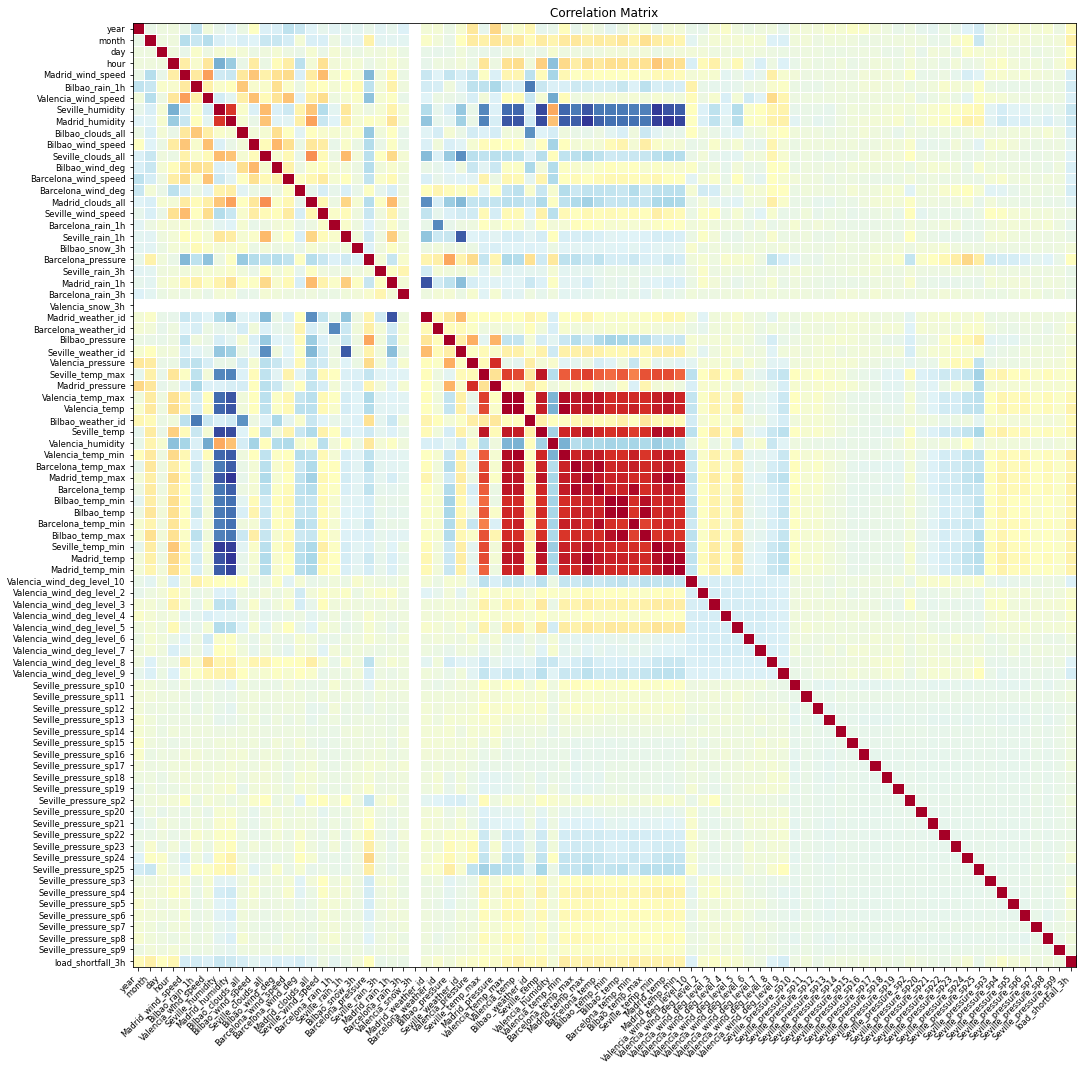

In [55]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_cleaned.corr(), xnames = df_cleaned.corr().columns, ax = ax);

### Variable Selection by Correlation and Significance

We need a way of guiding us to choose the best ones to be our predictors. One way is to look at the correlations between the load_shortfall_3h and each variables in our DataFrame and select those with the strongest correlations (both positive and negative).

We also need to consider how significant those features are.

The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame for reference.

In [56]:
# Calculate correlations between predictor variables and the response variable
corrs = df_cleaned.corr()['load_shortfall_3h'].sort_values(ascending=False)

Using Pearson regression from SciPy:

In [57]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df_cleaned[col], df_cleaned['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

C:\Users\mac07\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Correlation_Coefficient   P_Value
Valencia_temp_min                          0.192340  0.000000
Valencia_pressure                          0.062494  0.000000
Valencia_wind_deg_level_4                  0.057561  0.000000
Seville_pressure_sp4                       0.056102  0.000000
Madrid_humidity                           -0.145567  0.000000
Bilbao_wind_speed                         -0.062618  0.000000
Madrid_clouds_all                         -0.067509  0.000000
Valencia_wind_deg_level_8                 -0.079214  0.000000
Seville_clouds_all                        -0.084482  0.000000
Barcelona_wind_speed                      -0.086986  0.000000
Valencia_wind_deg_level_10                -0.088146  0.000000
Valencia_wind_speed                       -0.098956  0.000000
Bilbao_wind_deg                           -0.102116  0.000000
Bilbao_clouds_all                         -0.110577  0.000000
Madrid_wind_speed                         -0.115110  0.000000
Valencia_wind_deg_level_9                 -0.116701  0.000000
Barcelona_wind_deg                        -0.120611  0.000000
Bilbao_rain_1h                            -0.123118  0.000000
Madrid_pressure                            0.067134  0.000000
Valencia_wind_deg_level_3                  0.071007  0.000000
Seville_humidity                          -0.161581  0.000000
day                                        0.092880  0.000000
Seville_temp                               0.142206  0.000000
Seville_temp_max                           0.088762  0.000000
Bilbao_temp                                0.159348  0.000000
Seville_temp_min                           0.161895  0.000000
Madrid_temp_min                            0.162086  0.000000
Bilbao_temp_max                            0.162213  0.000000
Valencia_temp                              0.163123  0.000000
Barcelona_temp_max                         0.152554  0.000000
Barcelona_temp                             0.172500  0.000000
Madrid_temp                                0.172694  0.000000
month                                      0.175632  0.000000
Barcelona_temp_min                         0.188762  0.000000
hour                                       0.141665  0.000000
Madrid_temp_max                            0.168302  0.000000
Bilbao_temp_min                            0.158306  0.000000
year                                       0.121923  0.000000
Bilbao_weather_id                          0.123868  0.000000
Valencia_temp_max                          0.133820  0.000000
Barcelona_pressure                         0.102638  0.000000
Valencia_wind_deg_level_2                  0.054401  0.000001
Barcelona_weather_id                       0.054509  0.000001
Barcelona_rain_1h                         -0.053733  0.000001
Seville_weather_id                         0.051575  0.000002
Valencia_wind_deg_level_5                  0.041857  0.000123
Seville_rain_3h                           -0.035696  0.001057
Seville_pressure_sp25                     -0.032454  0.002908
Seville_pressure_sp24                      0.030277  0.005479
Seville_pressure_sp22                     -0.028336  0.009340
Seville_pressure_sp12                     -0.027187  0.012634
Madrid_weather_id                          0.025377  0.019924
Barcelona_rain_3h                         -0.025187  0.020868
Seville_rain_1h                           -0.024801  0.022907
Valencia_humidity                          0.024697  0.023486
Seville_pressure_sp6                       0.021428  0.049355
Seville_pressure_sp3                       0.019501  0.073671
Seville_pressure_sp19                     -0.019076  0.080165
Seville_pressure_sp21                     -0.018194  0.095168
Seville_pressure_sp5                       0.018124  0.096436

Now, we've got a sorted list of the p-values and correlation coefficients for each of the features, when considered on their own.

If we were to use a logic test with a significance value of 5% (p-value < 0.05), we could infer that the following features are statistically significant:

- Valencia_temp_min	
- Valencia_wind_deg_level_2	
- Bilbao_rain_1h	
- Barcelona_rain_1h	
- Bilbao_wind_speed
- Madrid_clouds_all
- Valencia_wind_deg_level_8	
- Valencia_wind_deg_level_10	
- Seville_weather_id	
- Seville_clouds_all	
- Barcelona_wind_deg	
- Bilbao_wind_deg	
- Bilbao_clouds_all	
- Valencia_wind_deg_level_9	
- Valencia_wind_speed
- Madrid_humidity	
- Madrid_wind_speed	
- Barcelona_wind_speed	
- Barcelona_weather_id	
- Seville_humidity	
- Valencia_pressure	
- Valencia_wind_deg_level_4	
- Valencia_temp_max	
- Bilbao_weather_id	
- Seville_temp	
- Barcelona_temp_max	
- Bilbao_temp_min
- Valencia_temp	
- Seville_temp_min	
- Seville_temp_max	
- Bilbao_temp	
- Bilbao_temp_max	
- Madrid_temp_max	
- Barcelona_temp	
- Madrid_temp_min	
- Barcelona_temp_min	
- Valencia_wind_deg_level_3	
- Madrid_temp	
- Madrid_pressure	
- Seville_pressure_sp4	
- Valencia_wind_deg_level_5	
- Seville_wind_speed	
- Valencia_humidity	
- Bilbao_pressure	
- Barcelona_pressure	
- Seville_pressure_sp24	
- Seville_rain_3h	
- Bilbao_snow_3h	
- Seville_rain_1h	
- Madrid_weather_id	
- Seville_pressure_sp22	
- Madrid_rain_1h	
- Seville_pressure_sp12	
- Barcelona_rain_3h
- Valencia_snow_3h	

Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame X

In [58]:
# The dependent variable remains the same:
y_data = df_cleaned['load_shortfall_3h']  # y_name = 'load_shortfall_3h'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_cleaned[X_names]

However, we also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

In [59]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columns where correlation coefficients > 0.8 or <-0.8
corr[np.abs(corr) > 0.8]

Valencia_temp_min  Barcelona_temp_min  month  \
Valencia_temp_min                    1.000000            0.879987    NaN   
Barcelona_temp_min                   0.879987            1.000000    NaN   
month                                     NaN                 NaN    1.0   
Madrid_temp                          0.895655            0.852720    NaN   
Barcelona_temp                       0.892026            0.963541    NaN   
Madrid_temp_max                      0.892251            0.835518    NaN   
Valencia_temp                        0.986073            0.873980    NaN   
Bilbao_temp_max                      0.802274                 NaN    NaN   
Madrid_temp_min                      0.857599            0.836951    NaN   
Seville_temp_min                     0.870460            0.829282    NaN   
Bilbao_temp                          0.828759            0.808576    NaN   
Bilbao_temp_min                      0.829619            0.829236    NaN   
Barcelona_temp_max                   0.859541            0.883685    NaN   
Seville_temp                         0.849369                 NaN    NaN   
hour                                      NaN                 NaN    NaN   
Valencia_temp_max                    0.949897            0.844045    NaN   
Bilbao_weather_id                         NaN                 NaN    NaN   
year                                      NaN                 NaN    NaN   
Barcelona_pressure                        NaN                 NaN    NaN   
day                                       NaN                 NaN    NaN   
Seville_temp_max                          NaN                 NaN    NaN   
Valencia_wind_deg_level_3                 NaN                 NaN    NaN   
Madrid_pressure                           NaN                 NaN    NaN   
Valencia_pressure                         NaN                 NaN    NaN   
Valencia_wind_deg_level_4                 NaN                 NaN    NaN   
Seville_pressure_sp4                      NaN                 NaN    NaN   
Barcelona_weather_id                      NaN                 NaN    NaN   
Valencia_wind_deg_level_2                 NaN                 NaN    NaN   
Seville_weather_id                        NaN                 NaN    NaN   
Valencia_wind_deg_level_5                 NaN                 NaN    NaN   
Seville_pressure_sp24                     NaN                 NaN    NaN   
Madrid_weather_id                         NaN                 NaN    NaN   
Valencia_humidity                         NaN                 NaN    NaN   
Seville_pressure_sp6                      NaN                 NaN    NaN   
Seville_rain_1h                           NaN                 NaN    NaN   
Barcelona_rain_3h                         NaN                 NaN    NaN   
Seville_pressure_sp12                     NaN                 NaN    NaN   
Seville_pressure_sp22                     NaN                 NaN    NaN   
Seville_pressure_sp25                     NaN                 NaN    NaN   
Seville_rain_3h                           NaN                 NaN    NaN   
Barcelona_rain_1h                         NaN                 NaN    NaN   
Bilbao_wind_speed                         NaN                 NaN    NaN   
Madrid_clouds_all                         NaN                 NaN    NaN   
Valencia_wind_deg_level_8                 NaN                 NaN    NaN   
Seville_clouds_all                        NaN                 NaN    NaN   
Barcelona_wind_speed                      NaN                 NaN    NaN   
Valencia_wind_deg_level_10                NaN                 NaN    NaN   
Valencia_wind_speed                       NaN                 NaN    NaN   
Bilbao_wind_deg                           NaN                 NaN    NaN   
Bilbao_clouds_all                         NaN                 NaN    NaN   
Madrid_wind_speed                         NaN                 NaN    NaN   
Valencia_wind_deg_level_9                 NaN                 NaN    NaN   


Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

In [60]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.8 or <-0.8
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.8)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

Barcelona_temp_min  Madrid_temp  Barcelona_temp  \
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Valencia_temp_min             0.879987     0.895655        0.892026   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Barcelona_temp_min            1.000000     0.852720        0.963541   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Madrid_temp                   0.852720     1.000000        0.902215   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Barcelona_temp                0.963541     0.902215        1.000000   
Madrid_temp_max               0.835518     0.988607        0.899903   
Madrid_temp_max               0.835518     0.988607        0.899903   
Madrid_temp_max               0.835518     0.988607        0.899903   
Madrid_temp_max               0.835518     0.988607        0.899903   
Madrid_temp_max               0.835518     0

Okay, so it looks like all our temp columns are highly correlated (perhaps unsurprising if you take a moment to think about it). The cities are not that far away from each other.

This is also visible looking back at the correlation coefficient heatmap and matrix from earlier, but a more focused / subset view of the matrix is useful to isolate the coefficients of interest.

We can keep Madrid_temp since Madrid is the most centrally located of the cities and the p-values look the same (so try and error), so let's drop the rest of the temps from the feature dataframe.

In [61]:
def find_correlation(data, threshold=0.5, remove_negative=False):
    corr_mat = data.corr()
    if remove_negative:
        corr_mat = np.abs(corr_mat)
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][np.abs(corr_mat[col]) > threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [62]:
# Lets take a new subset of our potential independent variables
# X_remove = ['Valencia_temp_min', 'Barcelona_temp_min', 'Barcelona_temp', 'Madrid_temp_max', 'Bilbao_temp_max', 'Bilbao_temp', 'Madrid_temp_min',
#            'Seville_temp_min', 'Valencia_temp', 'Bilbao_temp_min', 'Barcelona_temp_max', 'Seville_temp', 'Valencia_temp_max', 'Seville_temp_max']
X_remove = find_correlation(df_cleaned)

X_corr_names = [col for col in X_names if col not in X_remove]

In [63]:
newX_data = df_cleaned[X_corr_names]

In [64]:
newX_data.corr()

month      hour  Bilbao_weather_id      year  \
month                       1.000000  0.001058           0.123531 -0.023787   
hour                        0.001058  1.000000           0.007797 -0.000329   
Bilbao_weather_id           0.123531  0.007797           1.000000  0.142311   
year                       -0.023787 -0.000329           0.142311  1.000000   
Barcelona_pressure          0.171359 -0.028050           0.260977 -0.034638   
day                        -0.002668 -0.001281          -0.017588 -0.005307   
Valencia_wind_deg_level_3   0.026945  0.175303           0.080959  0.032364   
Madrid_pressure             0.235294 -0.010397           0.229671  0.306994   
Valencia_wind_deg_level_4   0.031905  0.025153           0.036593  0.067800   
Seville_pressure_sp4        0.014289  0.074532           0.038847  0.023976   
Barcelona_weather_id        0.015770 -0.005546           0.109725  0.030068   
Valencia_wind_deg_level_2  -0.003037  0.119525           0.032421 -0.037555   
Valencia_wind_deg_level_5   0.032195  0.130028           0.062006  0.002372   
Seville_pressure_sp24       0.082243 -0.023507           0.000482 -0.082498   
Madrid_weather_id           0.063866 -0.038490           0.153886  0.023977   
Valencia_humidity           0.153916 -0.357204           0.098911 -0.036422   
Seville_pressure_sp6        0.017962 -0.003494           0.032103  0.028441   
Barcelona_rain_3h          -0.064471  0.002066          -0.001598 -0.091914   
Seville_pressure_sp12      -0.009713 -0.015753           0.038522  0.018585   
Seville_pressure_sp22      -0.026086 -0.028625          -0.036152 -0.020779   
Seville_pressure_sp25      -0.159584 -0.009350          -0.062371 -0.126228   
Seville_rain_3h            -0.058288  0.011067          -0.055106 -0.069977   
Bilbao_wind_speed          -0.080832  0.203721          -0.011781  0.085602   
Madrid_clouds_all          -0.102856  0.022562          -0.159126 -0.085893   
Valencia_wind_deg_level_8  -0.092158 -0.013259          -0.065851  0.003938   
Barcelona_wind_speed       -0.118099  0.192067          -0.056711 -0.196993   
Valencia_wind_deg_level_10 -0.059116 -0.103952          -0.125467 -0.033886   
Valencia_wind_speed        -0.221043  0.237822          -0.162374  0.012227   
Bilbao_wind_deg            -0.160214  0.116483          -0.255595 -0.101258   
Madrid_wind_speed          -0.221530  0.193561          -0.204651 -0.024876   
Valencia_wind_deg_level_9  -0.099057 -0.091760          -0.115314 -0.048484   
Barcelona_wind_deg          0.020908 -0.199149           0.048047 -0.157298   
Madrid_humidity            -0.074382 -0.313834          -0.136425 -0.083017   

                            Barcelona_pressure       day  \
month                                 0.171359 -0.002668   
hour                                 -0.028050 -0.001281   
Bilbao_weather_id                     0.260977 -0.017588   
year                                 -0.034638 -0.005307   
Barcelona_pressure                    1.000000  0.009569   
day                                   0.009569  1.000000   
Valencia_wind_deg_level_3            -0.005214 -0.006256   
Madrid_pressure                       0.148056 -0.036785   
Valencia_wind_deg_level_4             0.053111  0.004147   
Seville_pressure_sp4                 -0.121493  0.032021   
Barcelona_weather_id                  0.184134 -0.038629   
Valencia_wind_deg_level_2             0.035444  0.015103   
Valencia_wind_deg_level_5             0.042338 -0.007908   
Seville_pressure_sp24                 0.308469  0.068462   
Madrid_weather_id                     0.160049 -0.030627   
Valencia_humidity                     0.220349  0.041678   
Seville_pressure_sp6                 -0.093858  0.009052   
Barcelona_rain_3h                     0.052051 -0.021099   
Seville_pressure_sp12                -0.042470 -0.001563   
Seville_pressure_sp22                 0.138926  0.003957   
Seville_pressure_sp25                 0.198274  0.039859   
Seville_rain_3h         

Next we are going to drop all the Weather id columns because there are Code used to describe weather. e.g 800 means the weather is clear.

In [27]:
# X_remove = ['Bilbao_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Madrid_weather_id' ]
# X_corr_names = [col for col in X_corr_names if col not in X_remove]

In [65]:
X_data = df_cleaned[X_corr_names]

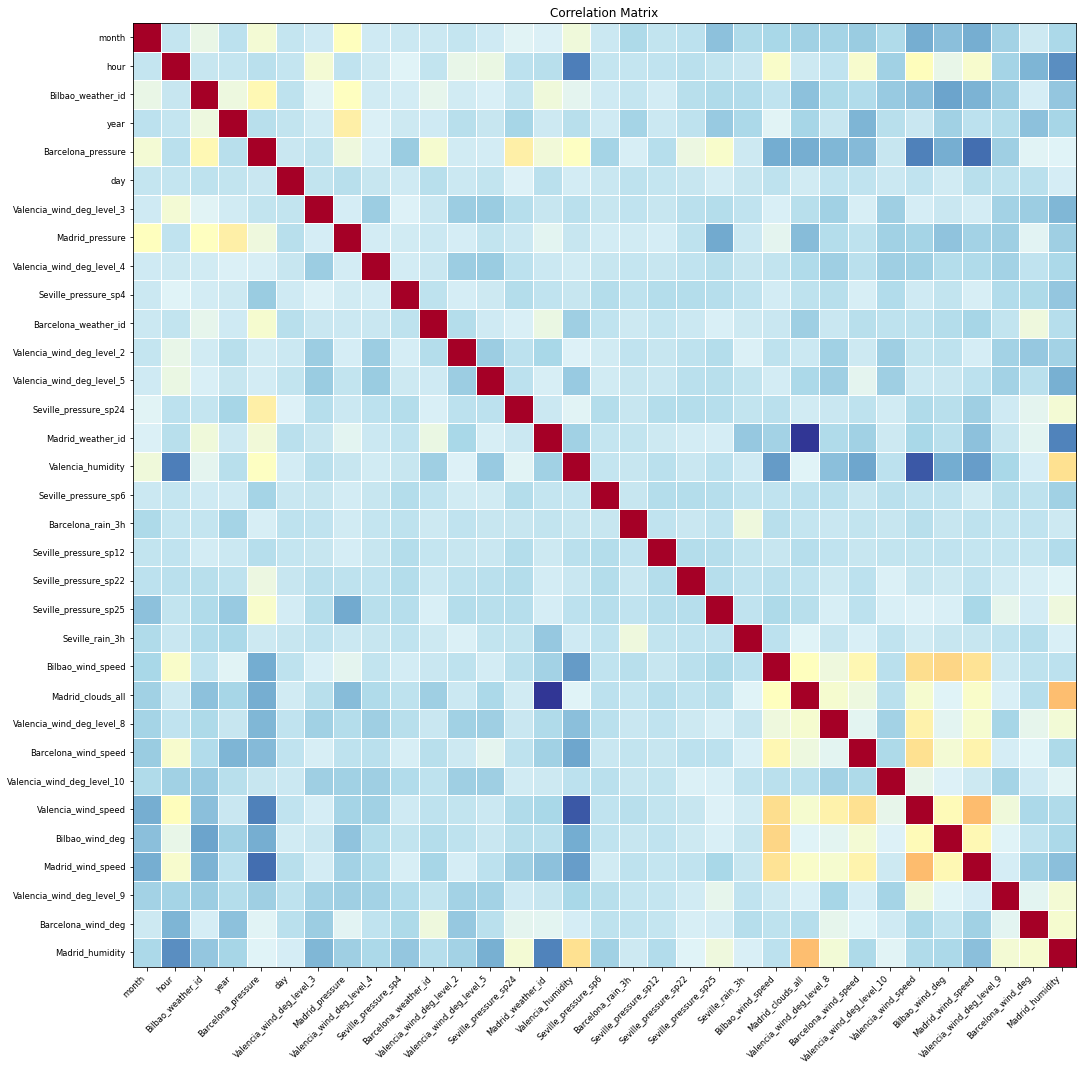

In [66]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(X_data.corr(), xnames = X_data.corr().columns, ax = ax);

### Preprocessing

In [68]:
# Separate the features from the response
X = X_data

y = y_data

In [69]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)

### Training

In [70]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

### Checking accuracy 
To evaluate the performance of our model, we can report the mean square error or plot predicted output vs expected output.

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
# Get predictions
y_pred = RF.predict(x_test)

# # Compute RMSE
# print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

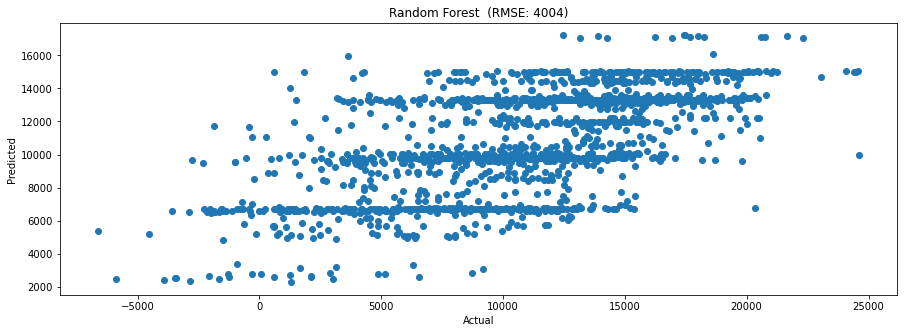

In [73]:

rmse = round(np.sqrt(mean_squared_error(y_pred,y_test)))

plt.figure(figsize=(15,5))


plt.scatter(y_test,y_pred)
# plt.plot(y_test,y_pred,'r')
plt.title('Random Forest' +"  (RMSE: "+str(rmse)+ ")")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Testing 

In [84]:
test_df.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0          20.000000           3.000000            0.000000       193.333333   
1           0.000000           3.666667            0.000000       143.333333   
2           0.000000           2.333333            6.666667       130.000000   
3          26.666667           5.666667            6.666667       196.666667   
4          26.666667          10.666667            0.000000       233.333333   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              4.000000          176.666667                0.0   
1              4.666667          266.666667                0.0   
2              4.000000          263.333333                0.0   
3              2.333333           86.666667                0.0   
4              4.666667          283.333333                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            1.000000                0.0             sp25              0.0   
1            0.666667                0.0             sp25              0.0   
2            0.666667                0.0             sp25              0.0   
3            1.333333                0.0             sp25              0.0   
4            1.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0               0         1017.333333              0.0             0.0   
1               0         1020.333333              0.0             0.0   
2               0         1023.000000              0.0             0.0   
3               0         1025.666667              0.0             0.0   
4               0         1026.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0                 0              800.0   
1                0.0                 0              800.0   
2                0.0                 0              800.0   
3                0.0                 0              800.0   
4                0.0                 0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0            800.000000      1025.666667          800.000000   
1            800.333333      1026.666667          800.000000   
2            800.000000      1025.333333          800.333333   
3            800.000000      1025.000000          800.333333   
4            800.333333      1022.333333          800.000000   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0                NaN        284.483333      1030.000000         287.483333   
1                NaN        282.483333      1030.333333         284.150000   
2                NaN        280.816667      1030.666667         282.816667   
3                NaN        281.150000      1032.333333         283.483333   
4                NaN        287.150000      1032.333333         287.150000   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0   

In [85]:
test_df = test_df.drop('Unnamed: 0', axis='columns')

In [86]:
test_df.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0  2018-01-01 00:00:00           5.000000           level_8             0.0   
1  2018-01-01 03:00:00           4.666667           level_8             0.0   
2  2018-01-01 06:00:00           2.333333           level_7             0.0   
3  2018-01-01 09:00:00           2.666667           level_7             0.0   
4  2018-01-01 12:00:00           4.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             5.000000         87.000000        71.333333          20.000000   
1             5.333333         89.000000        78.000000           0.000000   
2             5.000000         89.000000        89.666667           0.000000   
3             5.333333         93.333333        82.666667          26.666667   
4             8.666667         65.333333        64.000000          26.666667   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0           3.000000            0.000000       193.333333   
1           3.666667            0.000000       143.333333   
2           2.333333            6.666667       130.000000   
3           5.666667            6.666667       196.666667   
4          10.666667            0.000000       233.333333   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              4.000000          176.666667                0.0   
1              4.666667          266.666667                0.0   
2              4.000000          263.333333                0.0   
3              2.333333           86.666667                0.0   
4              4.666667          283.333333                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            1.000000                0.0             sp25              0.0   
1            0.666667                0.0             sp25              0.0   
2            0.666667                0.0             sp25              0.0   
3            1.333333                0.0             sp25              0.0   
4            1.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0               0         1017.333333              0.0             0.0   
1               0         1020.333333              0.0             0.0   
2               0         1023.000000              0.0             0.0   
3               0         1025.666667              0.0             0.0   
4               0         1026.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0                 0              800.0   
1                0.0                 0              800.0   
2                0.0                 0              800.0   
3                0.0                 0              800.0   
4                0.0                 0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0            800.000000      1025.666667          800.000000   
1            800.333333      1026.666667          800.000000   
2            800.000000      1025.333333          800.333333   
3            800.000000      1025.000000          800.333333   
4            800.333333      1022.333333          800.000000   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0                NaN        284.483333      1030.000000         287.483333   
1                NaN        282.483333      1030.333333         284.150000   
2                NaN        280.816667      1030.666667         282.816667   
3                NaN        281.150000      1032.333333         283.483333   
4                NaN        287.150000      1032.333333         287.150000   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     287.483333         801.000000    283.673333          46.333333   
1     284.150000   

In [87]:
test_df['time'] = test_df['time'].astype('datetime64[ns]')
test_df['year'] = pd.DatetimeIndex(test_df['time']).year
test_df['month'] = pd.DatetimeIndex(test_df['time']).month
test_df['day'] = pd.DatetimeIndex(test_df['time']).day
test_df['hour'] = pd.DatetimeIndex(test_df['time']).hour

In [88]:
test_df.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0 2018-01-01 00:00:00           5.000000           level_8             0.0   
1 2018-01-01 03:00:00           4.666667           level_8             0.0   
2 2018-01-01 06:00:00           2.333333           level_7             0.0   
3 2018-01-01 09:00:00           2.666667           level_7             0.0   
4 2018-01-01 12:00:00           4.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             5.000000         87.000000        71.333333          20.000000   
1             5.333333         89.000000        78.000000           0.000000   
2             5.000000         89.000000        89.666667           0.000000   
3             5.333333         93.333333        82.666667          26.666667   
4             8.666667         65.333333        64.000000          26.666667   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0           3.000000            0.000000       193.333333   
1           3.666667            0.000000       143.333333   
2           2.333333            6.666667       130.000000   
3           5.666667            6.666667       196.666667   
4          10.666667            0.000000       233.333333   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              4.000000          176.666667                0.0   
1              4.666667          266.666667                0.0   
2              4.000000          263.333333                0.0   
3              2.333333           86.666667                0.0   
4              4.666667          283.333333                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            1.000000                0.0             sp25              0.0   
1            0.666667                0.0             sp25              0.0   
2            0.666667                0.0             sp25              0.0   
3            1.333333                0.0             sp25              0.0   
4            1.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0               0         1017.333333              0.0             0.0   
1               0         1020.333333              0.0             0.0   
2               0         1023.000000              0.0             0.0   
3               0         1025.666667              0.0             0.0   
4               0         1026.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0                 0              800.0   
1                0.0                 0              800.0   
2                0.0                 0              800.0   
3                0.0                 0              800.0   
4                0.0                 0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0            800.000000      1025.666667          800.000000   
1            800.333333      1026.666667          800.000000   
2            800.000000      1025.333333          800.333333   
3            800.000000      1025.000000          800.333333   
4            800.333333      1022.333333          800.000000   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0                NaN        284.483333      1030.000000         287.483333   
1                NaN        282.483333      1030.333333         284.150000   
2                NaN        280.816667      1030.666667         282.816667   
3                NaN        281.150000      1032.333333         283.483333   
4                NaN        287.150000      1032.333333         287.150000   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     287.483333         801.000000    283.673333          46.333333   
1     284.150000        

In [89]:
new_test_df = pd.get_dummies(test_df, drop_first=True)

In [90]:
new_test_df.head()

time  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
0 2018-01-01 00:00:00           5.000000             0.0             5.000000   
1 2018-01-01 03:00:00           4.666667             0.0             5.333333   
2 2018-01-01 06:00:00           2.333333             0.0             5.000000   
3 2018-01-01 09:00:00           2.666667             0.0             5.333333   
4 2018-01-01 12:00:00           4.000000             0.0             8.666667   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         87.000000        71.333333          20.000000           3.000000   
1         89.000000        78.000000           0.000000           3.666667   
2         89.000000        89.666667           0.000000           2.333333   
3         93.333333        82.666667          26.666667           5.666667   
4         65.333333        64.000000          26.666667          10.666667   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0            0.000000       193.333333              4.000000   
1            0.000000       143.333333              4.666667   
2            6.666667       130.000000              4.000000   
3            6.666667       196.666667              2.333333   
4            0.000000       233.333333              4.666667   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0          176.666667                0.0            1.000000   
1          266.666667                0.0            0.666667   
2          263.333333                0.0            0.666667   
3           86.666667                0.0            1.333333   
4          283.333333                0.0            1.000000   

   Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  \
0                0.0              0.0               0         1017.333333   
1                0.0              0.0               0         1020.333333   
2                0.0              0.0               0         1023.000000   
3                0.0              0.0               0         1025.666667   
4                0.0              0.0               0         1026.000000   

   Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  \
0              0.0             0.0                0.0                 0   
1              0.0             0.0                0.0                 0   
2              0.0             0.0                0.0                 0   
3              0.0             0.0                0.0                 0   
4              0.0             0.0                0.0                 0   

   Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0              800.0            800.000000      1025.666667   
1              800.0            800.333333      1026.666667   
2              800.0            800.000000      1025.333333   
3              800.0            800.000000      1025.000000   
4              800.0            800.333333      1022.333333   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0          800.000000                NaN        284.483333      1030.000000   
1          800.000000                NaN        282.483333      1030.333333   
2          800.333333                NaN        280.816667      1030.666667   
3          800.333333                NaN        281.150000      1032.333333   
4          800.000000                NaN        287.150000      1032.333333   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0         287.483333     287.483333         801.000000    283.673333   
1         284.150000     284.150000         721.000000    281.673333   
2         282.816667     282.816667         800.000000    280.613333   
3         283.483333     283.483333         801.333333    279.936667   
4         287.150000     287.150000         801.333333    285.570000   

   Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  \
0         

In [91]:
new_test_df1 =  new_test_df[[i for i in new_test_df.columns if i in X.columns]]

In [93]:
new_test_df1.isnull().sum()

Madrid_wind_speed             0
Valencia_wind_speed           0
Madrid_humidity               0
Bilbao_wind_speed             0
Bilbao_wind_deg               0
Barcelona_wind_speed          0
Barcelona_wind_deg            0
Madrid_clouds_all             0
Barcelona_pressure            0
Seville_rain_3h               0
Barcelona_rain_3h             0
Madrid_weather_id             0
Barcelona_weather_id          0
Madrid_pressure               0
Bilbao_weather_id             0
Valencia_humidity             0
year                          0
month                         0
day                           0
hour                          0
Valencia_wind_deg_level_10    0
Valencia_wind_deg_level_2     0
Valencia_wind_deg_level_3     0
Valencia_wind_deg_level_4     0
Valencia_wind_deg_level_5     0
Valencia_wind_deg_level_8     0
Valencia_wind_deg_level_9     0
Seville_pressure_sp12         0
Seville_pressure_sp22         0
Seville_pressure_sp24         0
Seville_pressure_sp25         0
Seville_

In [92]:
new_test_df.head()

time  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
0 2018-01-01 00:00:00           5.000000             0.0             5.000000   
1 2018-01-01 03:00:00           4.666667             0.0             5.333333   
2 2018-01-01 06:00:00           2.333333             0.0             5.000000   
3 2018-01-01 09:00:00           2.666667             0.0             5.333333   
4 2018-01-01 12:00:00           4.000000             0.0             8.666667   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         87.000000        71.333333          20.000000           3.000000   
1         89.000000        78.000000           0.000000           3.666667   
2         89.000000        89.666667           0.000000           2.333333   
3         93.333333        82.666667          26.666667           5.666667   
4         65.333333        64.000000          26.666667          10.666667   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0            0.000000       193.333333              4.000000   
1            0.000000       143.333333              4.666667   
2            6.666667       130.000000              4.000000   
3            6.666667       196.666667              2.333333   
4            0.000000       233.333333              4.666667   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0          176.666667                0.0            1.000000   
1          266.666667                0.0            0.666667   
2          263.333333                0.0            0.666667   
3           86.666667                0.0            1.333333   
4          283.333333                0.0            1.000000   

   Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  \
0                0.0              0.0               0         1017.333333   
1                0.0              0.0               0         1020.333333   
2                0.0              0.0               0         1023.000000   
3                0.0              0.0               0         1025.666667   
4                0.0              0.0               0         1026.000000   

   Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  \
0              0.0             0.0                0.0                 0   
1              0.0             0.0                0.0                 0   
2              0.0             0.0                0.0                 0   
3              0.0             0.0                0.0                 0   
4              0.0             0.0                0.0                 0   

   Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0              800.0            800.000000      1025.666667   
1              800.0            800.333333      1026.666667   
2              800.0            800.000000      1025.333333   
3              800.0            800.000000      1025.000000   
4              800.0            800.333333      1022.333333   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0          800.000000                NaN        284.483333      1030.000000   
1          800.000000                NaN        282.483333      1030.333333   
2          800.333333                NaN        280.816667      1030.666667   
3          800.333333                NaN        281.150000      1032.333333   
4          800.000000                NaN        287.150000      1032.333333   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0         287.483333     287.483333         801.000000    283.673333   
1         284.150000     284.150000         721.000000    281.673333   
2         282.816667     282.816667         800.000000    280.613333   
3         283.483333     283.483333         801.333333    279.936667   
4         287.150000     287.150000         801.333333    285.570000   

   Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  \
0         

In [94]:
new_test_df1['load_shortfall_3h'] = RF.predict(new_test_df1)

<ipython-input-94-a512453455a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_df1['load_shortfall_3h'] = RF.predict(new_test_df1)


In [95]:
predict_df = pd.DataFrame({
    'time':test_df['time'],
    'load_shortfall_3h': new_test_df1['load_shortfall_3h']

        })

predict_df

time  load_shortfall_3h
0    2018-01-01 00:00:00       14988.849583
1    2018-01-01 03:00:00       14988.849583
2    2018-01-01 06:00:00       14988.849583
3    2018-01-01 09:00:00       14988.849583
4    2018-01-01 12:00:00       14988.849583
5    2018-01-01 15:00:00       14988.849583
6    2018-01-01 18:00:00       14988.849583
7    2018-01-01 21:00:00       14988.849583
8    2018-01-02 00:00:00       14988.849583
9    2018-01-02 03:00:00       14988.849583
10   2018-01-02 06:00:00       14988.849583
11   2018-01-02 09:00:00       14988.849583
12   2018-01-02 12:00:00       14988.849583
13   2018-01-02 15:00:00       14988.849583
14   2018-01-02 18:00:00       14988.849583
15   2018-01-02 21:00:00       14988.849583
16   2018-01-03 00:00:00       14988.849583
17   2018-01-03 03:00:00       14988.849583
18   2018-01-03 06:00:00       14988.849583
19   2018-01-03 09:00:00       14988.849583
20   2018-01-03 12:00:00       14988.849583
21   2018-01-03 15:00:00       14988.849583
22   2018-01-03 18:00:00       13372.836477
23   2018-01-03 21:00:00       14988.849583
24   2018-01-04 00:00:00       14989.237641
25   2018-01-04 03:00:00       14989.237641
26   2018-01-04 06:00:00       14988.849583
27   2018-01-04 09:00:00       14988.849583
28   2018-01-04 12:00:00       14988.849583
29   2018-01-04 15:00:00       14988.849583
30   2018-01-04 18:00:00       14988.849583
31   2018-01-04 21:00:00       14988.849583
32   2018-01-05 00:00:00       14988.849583
33   2018-01-05 03:00:00       14988.849583
34   2018-01-05 06:00:00       14988.849583
35   2018-01-05 09:00:00       14988.849583
36   2018-01-05 12:00:00       14988.849583
37   2018-01-05 15:00:00       14988.849583
38   2018-01-05 18:00:00       14988.849583
39   2018-01-05 21:00:00       14988.849583
40   2018-01-06 00:00:00       14988.849583
41   2018-01-06 03:00:00       14988.849583
42   2018-01-06 06:00:00       14988.849583
43   2018-01-06 09:00:00       13372.836477
44   2018-01-06 12:00:00       13372.836477
45   2018-01-06 15:00:00       14988.849583
46   2018-01-06 18:00:00       15023.627276
47   2018-01-06 21:00:00       14988.849583
48   2018-01-07 00:00:00       14988.849583
49   2018-01-07 03:00:00       14988.849583
50   2018-01-07 06:00:00       14988.849583
51   2018-01-07 09:00:00       14988.849583
52   2018-01-07 12:00:00       14988.849583
53   2018-01-07 15:00:00       14988.849583
54   2018-01-07 18:00:00       14988.849583
55   2018-01-07 21:00:00       14989.237641
56   2018-01-08 00:00:00       14989.237641
57   2018-01-08 03:00:00       14989.237641
58   2018-01-08 06:00:00       14989.237641
59   2018-01-08 09:00:00       14989.237641
60   2018-01-08 12:00:00       14989.237641
61   2018-01-08 15:00:00       14989.237641
62   2018-01-08 18:00:00       14989.237641
63   2018-01-08 21:00:00       15023.627276
64   2018-01-09 00:00:00       14989.237641
65   2018-01-09 03:00:00       14989.237641
66   2018-01-09 06:00:00       14989.237641
67   2018-01-09 09:00:00       14989.237641
68   2018-01-09 12:00:00       14989.237641
69   2018-01-09 15:00:00       14989.237641
70   2018-01-09 18:00:00       14989.237641
71   2018-01-09 21:00:00       14988.849583
72   2018-01-10 00:00:00       14988.849583
73   2018-01-10 03:00:00       15023.627276
74   2018-01-10 06:00:00       14989.237641
75   2018-01-10 09:00:00       14988.849583
76   2018-01-10 12:00:00       14988.849583
77   2018-01-10 15:00:00       14988.849583
78   2018-01-10 18:00:00       14988.849583
79   2018-01-10 21:00:00       14988.849583
80   2018-01-11 00:00:00       14988.849583
81   2018-01-11 03:00:00       14988.849583
82   2018-01-11 06:00:00       14988.849583
83   2018-01-11 09:00:00       14988.849583
84   2018-01-11 12:00:00       14988.849583
85   2018-01-11 15:00:00       14988.849583
86   2018-01-11 18:00:00       14988.849583
87   2018-01-11 21:00:00       14988.849583
88   2018-01-12 00:00:00       14988.849583
89   2018-01-12 03:00:00       14988.849583
90   2018-01-12 

In [96]:
# file_name = #a00 develop iterative file naming strings based on dates & models.
predict_df.to_csv('shortfall.csv', header=True, index=False)

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic